# MATPLOTLIB

## 1. LOAD STUDENT DATA

In [209]:
import pandas as pd

In [210]:
FILEPATH = 'https://raw.githubusercontent.com/profivan-ai/cdb-Python/refs/heads/main/arquivos/alunos_cursos.csv'
ENCODING = 'utf-8'
SEPARATOR = ';'

# pd.set_option('display.max_rows', 5)

try:
    df = pd.read_csv(filepath_or_buffer=FILEPATH, sep=SEPARATOR, encoding=ENCODING)
except FileNotFoundError:
    display('File not found')
    exit()

df

,Aluno,Curso,Nota,Presença,Projetos,Certificado
0,aluno01,Excel,8.5,9.2,4,Sim
1,aluno02,Python,7.8,8.6,3,Sim
2,aluno03,Lógica,6.2,7.0,2,Não
3,aluno04,Estatística,9.1,9.8,5,Sim
4,aluno05,Excel,5.4,6.3,1,Não
5,aluno06,Python,8.9,9.5,4,Sim
6,aluno07,Lógica,7.0,8.1,3,Sim
7,aluno08,Estatística,6.8,7.4,2,Não
8,aluno09,Excel,9.3,9.7,5,Sim
9,aluno10,Python,4.5,5.8,1,Não


## 2. TREATING DATA (NULLS, COLUMNS)

### 2.1. HANDLING NULLS

In [211]:
df.isnull().sum()

Aluno          0
Curso          0
Nota           0
Presença       0
Projetos       0
Certificado    0
dtype: int64

### 2.2. REMOVING SPECIFIC COLUMN

Removing column `Projetos` as it is not important for performance calculation

In [212]:
COLUMN_BE_REMOVED = 'Projetos'
AXIS = 1

# Inplace parameter forces the deletion
df.drop(columns=COLUMN_BE_REMOVED, axis=AXIS, inplace=True)
df.head()

,Aluno,Curso,Nota,Presença,Certificado
0,aluno01,Excel,8.5,9.2,Sim
1,aluno02,Python,7.8,8.6,Sim
2,aluno03,Lógica,6.2,7.0,Não
3,aluno04,Estatística,9.1,9.8,Sim
4,aluno05,Excel,5.4,6.3,Não


### 2.3. ADDING COLUMNS

There are new business rules to be applied

#### 2.3.1. COLUMN APROVADO

Business rule:
- grade, at least, 7.5 (`Nota >= 7.5`)
- participation, at least, 75% (`Presença >= 75%`)

In [213]:
df["Aprovado"] = (df["Nota"] >= 7.5) & (df["Presença"] >= 7.5)
df

,Aluno,Curso,Nota,Presença,Certificado,Aprovado
0,aluno01,Excel,8.5,9.2,Sim,True
1,aluno02,Python,7.8,8.6,Sim,True
2,aluno03,Lógica,6.2,7.0,Não,False
3,aluno04,Estatística,9.1,9.8,Sim,True
4,aluno05,Excel,5.4,6.3,Não,False
5,aluno06,Python,8.9,9.5,Sim,True
6,aluno07,Lógica,7.0,8.1,Sim,False
7,aluno08,Estatística,6.8,7.4,Não,False
8,aluno09,Excel,9.3,9.7,Sim,True
9,aluno10,Python,4.5,5.8,Não,False


#### 2.3.2. COLUMN DESEMPENHO

Business rule:
- high performance: grade greater than or equal 8.0 (`Nota >= 8.0`)
- medium performance: grade greater than or equal 6.0 (`Nota >= 6.0 & Nota < 8.0`)
- low performance: grade less than 6.0 (`Nota < 6.0`)

In [214]:
def performance(grade: float):
    PERFORMANCE_CONDITIONS = [
        (lambda grade: grade >= 8.0, "Alto"),
        (lambda grade: grade >= 6.0, "Médio"),
        (lambda grade: True, "Baixo"),
    ]

    return next(
        (status for condition, status in PERFORMANCE_CONDITIONS if condition(grade)),
        "Baixo"
    )

df["Desempenho"] = df["Nota"].apply(performance)
df

,Aluno,Curso,Nota,Presença,Certificado,Aprovado,Desempenho
0,aluno01,Excel,8.5,9.2,Sim,True,Alto
1,aluno02,Python,7.8,8.6,Sim,True,Médio
2,aluno03,Lógica,6.2,7.0,Não,False,Médio
3,aluno04,Estatística,9.1,9.8,Sim,True,Alto
4,aluno05,Excel,5.4,6.3,Não,False,Baixo
5,aluno06,Python,8.9,9.5,Sim,True,Alto
6,aluno07,Lógica,7.0,8.1,Sim,False,Médio
7,aluno08,Estatística,6.8,7.4,Não,False,Médio
8,aluno09,Excel,9.3,9.7,Sim,True,Alto
9,aluno10,Python,4.5,5.8,Não,False,Baixo


## 3. DATA ANALYSIS

### 3.1. NEW MEASURES

#### 3.1.1. STUDENT'S GRADE AVERAGE PER COURSE

In [215]:
average_grades = df.groupby('Curso')['Nota'].mean(numeric_only=True).sort_values(ascending=True).reset_index()
average_grades

,Curso,Nota
0,Lógica,7.185714
1,Python,7.287500
2,Excel,7.475000
3,Estatística,7.857143


#### 3.1.2. STUDENT'S APPROVAL PER COURSE

In [216]:
course_approval = df.groupby('Curso')['Aprovado'].sum().reset_index()
course_approval

,Curso,Aprovado
0,Estatística,4
1,Excel,4
2,Lógica,2
3,Python,5


## 4. GENERATING DATA TO PLOT CHARTS (BAR, PIE, LINE)

In [217]:
import matplotlib.pyplot as plt

### 4.1. NUMBER OF STUDENTS BY COURSE (BAR CHART)

In [218]:
KIND = 'bar'
COLOR = 'blue'
FIGSIZE = (8,5)
TITLE = 'Number of students per course'
XLABEL = 'Courses'
YLABEL = 'Students'

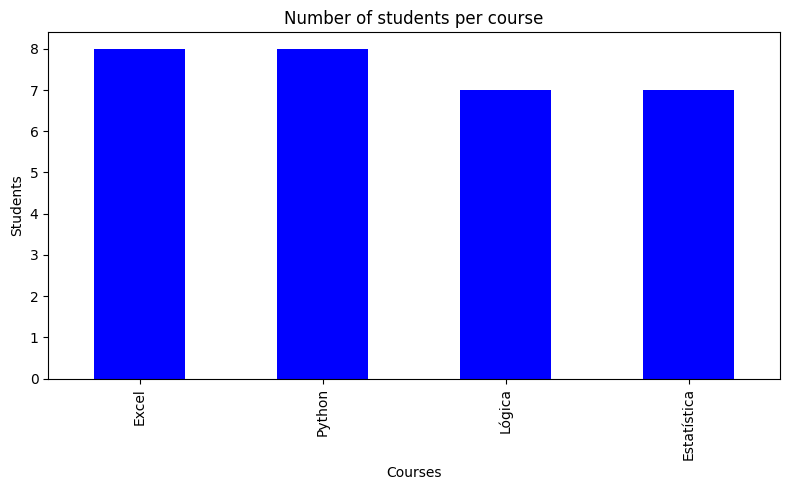

In [219]:
df['Curso'].value_counts().plot(
    kind=KIND,
    color=COLOR,
    figsize=FIGSIZE,
    title=TITLE,
    xlabel=XLABEL,
    ylabel=YLABEL
)
plt.tight_layout()
plt.show()

### 4.2. DISTRIBUTION BY PERFORMANCE (PIE CHART)

In [220]:
KIND = 'pie'
FIGSIZE = (8,5)
TITLE = 'Distribution by performance'
YLABEL = ''
AUTOPCT = '%1.2f%%'

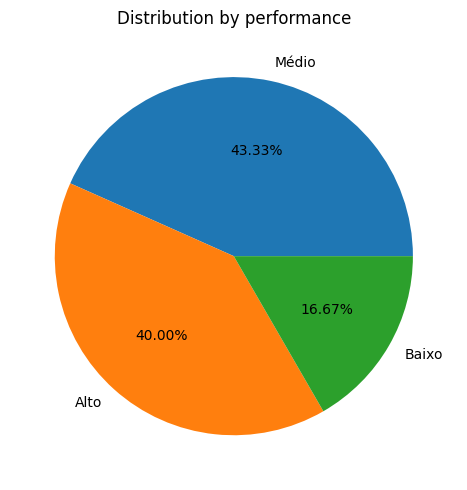

In [221]:
df['Desempenho'].value_counts().plot(
    kind=KIND,
    figsize=FIGSIZE,
    title=TITLE,
    ylabel=YLABEL,
    autopct=AUTOPCT,
)
plt.tight_layout()
plt.show()

### 4.3. GRADE FREQUENCY BY COURSE (LINE CHART)

#### 4.3.1. ALL COURSES TOGETHER

In [222]:
KIND = 'line'
FIGSIZE = (8,5)
TITLE = 'Grade frequency by course'
LEGEND = True
XLABEL = 'Courses'
YLABEL = 'Grades'

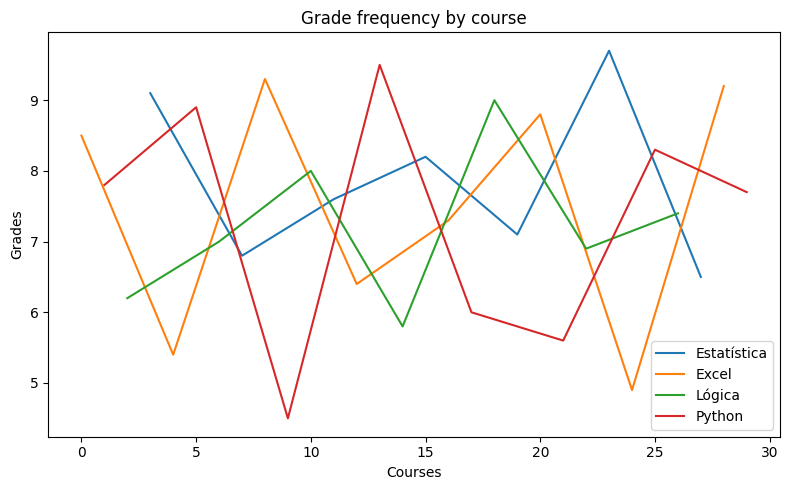

In [223]:
df.groupby('Curso')['Nota'].plot(
    kind=KIND,
    figsize=FIGSIZE,
    title=TITLE,
    legend=LEGEND,
    xlabel=XLABEL,
    ylabel=YLABEL,
)
plt.tight_layout()
plt.show()

#### 4.3.2. PLOT A SINGLE COURSE

In [224]:
COURSE_NAME = 'Excel'
Y_FIELD = 'Nota'

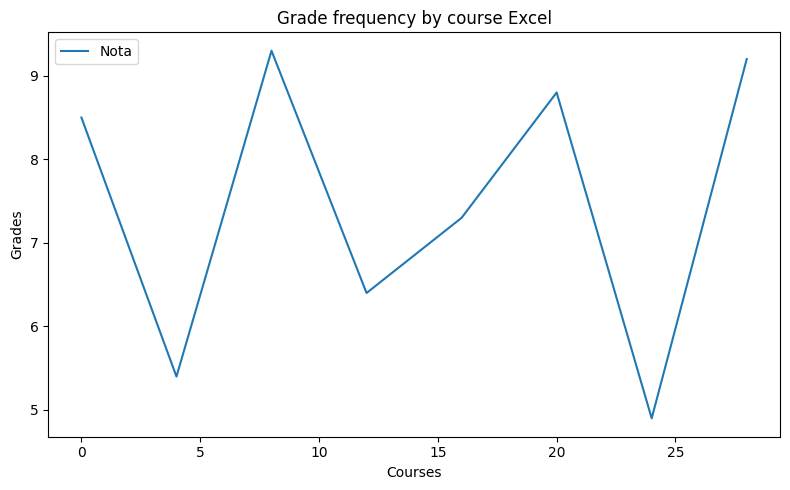

In [225]:
df[df['Curso'] == COURSE_NAME].plot(
    kind=KIND,
    figsize=FIGSIZE,
    title=f'{TITLE} {COURSE_NAME}',
    legend=LEGEND,
    y=Y_FIELD,
    xlabel=XLABEL,
    ylabel=YLABEL,
)
plt.tight_layout()
plt.show()

### 4.4. STUDENT'S GRADE AVERAGE BY COURSE

#### 4.4.1. BAR CHART

In [226]:
import numpy as np

In [227]:
X_FIELD = 'Curso'
KIND = 'bar'
COLOR = 'blue'
FIGSIZE = (8,5)
TITLE = 'Average grade of students per course'
XLABEL = 'Courses'
YLABEL = 'Grades'

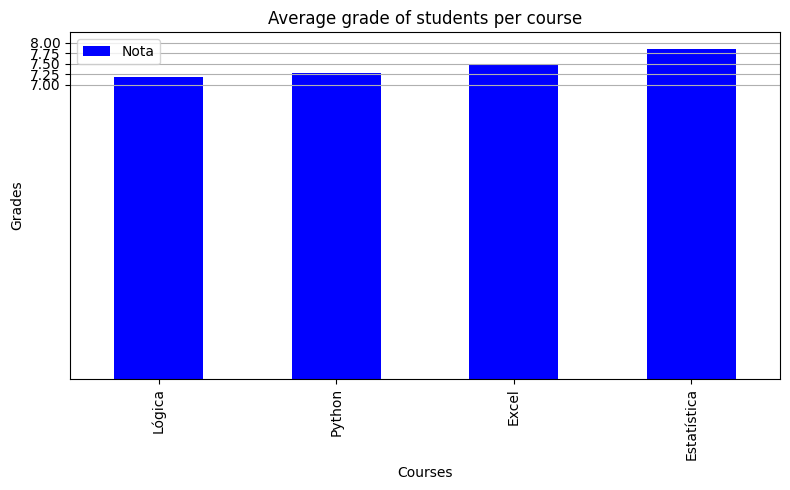

In [228]:
ax = average_grades.plot(
    x=X_FIELD,
    kind=KIND,
    color=COLOR,
    figsize=FIGSIZE,
    title=TITLE,
    xlabel=XLABEL,
    ylabel=YLABEL,
)

y_min = average_grades['Nota'].min()
y_max = average_grades['Nota'].max()

ax.set_yticks(np.arange(np.floor(y_min * 2)/2, np.ceil(y_max * 2)/2 + 0.25, 0.25))
ax.grid(axis='y')

plt.tight_layout()
plt.show()

#### 4.4.2. LINE CHART

In [229]:
import numpy as np

In [230]:
X_FIELD = 'Curso'
KIND = 'line'
COLOR = 'blue'
FIGSIZE = (8,5)
TITLE = 'Average grade of students per course'
XLABEL = 'Courses'
YLABEL = 'Grades'

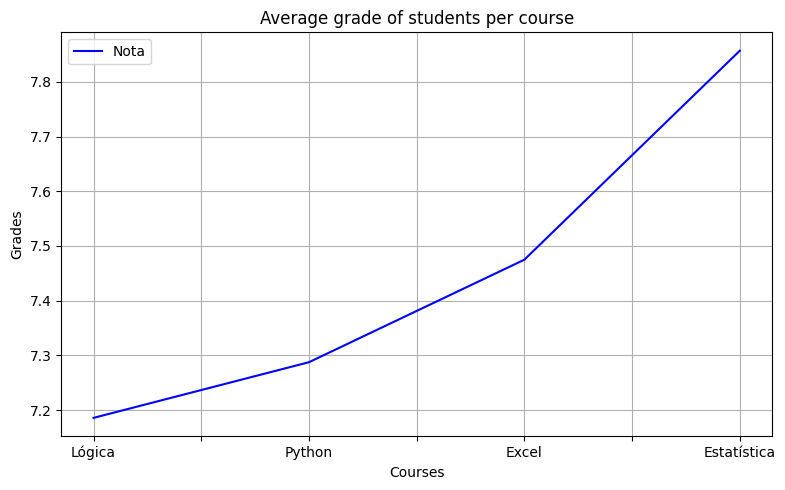

In [231]:
ax = average_grades.plot(
    x=X_FIELD,
    kind=KIND,
    color=COLOR,
    figsize=FIGSIZE,
    title=TITLE,
    xlabel=XLABEL,
    ylabel=YLABEL,
)

ax.grid(True)

plt.tight_layout()
plt.show()

### 4.5. APPROVAL BY COURSE (PIE CHART)

In [232]:
LABELS = course_approval['Curso']
Y_FIELD = 'Aprovado'
KIND = 'pie'
FIGSIZE = (8,5)
TITLE = 'Approval by Course'
YLABEL = ''
AUTOPCT = '%1.2f%%'

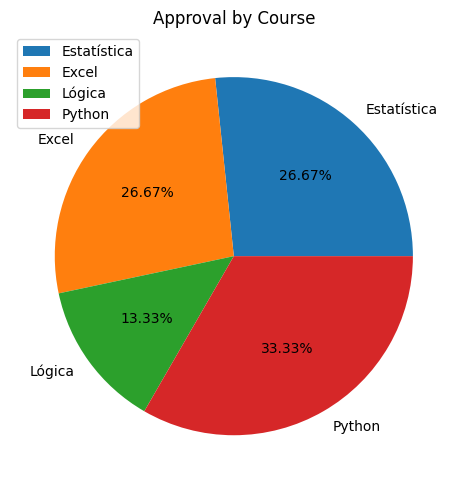

In [233]:
course_approval.plot(
    y=Y_FIELD,
    kind=KIND,
    figsize=FIGSIZE,
    title=TITLE,
    labels=LABELS,
    ylabel=YLABEL,
    autopct=AUTOPCT,
)
plt.tight_layout()
plt.show()